In [7]:
%cd C:\Users\Bruno Ferrari\Documents\Bruno\2019\2s\MC\artigos revisão\Artigos Mes\GD\bdp\dbdp_instances

C:\Users\Bruno Ferrari\Documents\Bruno\2019\2s\MC\artigos revisão\Artigos Mes\GD\bdp\dbdp_instances


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from lazypredict.Supervised import LazyClassifier

from sklearn.preprocessing import scale

from sklearn.model_selection import train_test_split

In [9]:
dados_org = pd.read_excel('final_results.xlsx')

In [10]:
dados_org.head()

,Instance,V,E,V_diff,deg_mean,deg_std,deg_median,density,V1,V2,deg_min,Crossing_vns,Time_vns,Crossing_ts,Time_ts,Crossing_gs,Time_gs,Crossing_gs_vns,Time_gs_vns
0,G_00_02_scr_0001_10,46,43,26,1.87,1.41,1.00,0.12,36,10,1,60.00,2.09,31.00,2.32,86,1.31,237.00,1.44
1,G_00_02_scr_0001_20,42,39,22,1.86,1.32,1.00,0.12,32,10,1,32.00,1.67,34.00,1.03,40,1.79,205.00,1.01
2,G_00_02_scr_0001_30,38,35,18,1.84,1.18,1.00,0.12,28,10,1,29.00,0.86,28.00,0.72,40,1.28,188.00,0.94
3,G_00_02_scr_0002_10,46,44,26,1.91,1.41,1.00,0.12,36,10,1,52.00,1.67,88.00,1.58,57,1.50,312.00,1.60
4,G_00_02_scr_0002_20,42,39,22,1.86,1.28,1.00,0.12,32,10,1,72.00,1.56,63.00,1.12,20,1.63,229.00,1.29


In [11]:
dados_org.tail()

,Instance,V,E,V_diff,deg_mean,deg_std,deg_median,density,V1,V2,deg_min,Crossing_vns,Time_vns,Crossing_ts,Time_ts,Crossing_gs,Time_gs,Crossing_gs_vns,Time_gs_vns
446,incgraph_50_50_0.3_0.6_1,160,1869,0,23.36,4.58,24.00,0.29,80,80,12,650147.00,2447.71,649880.00,2089.32,680564,5217.68,723427.00,1063.12
447,incgraph_50_50_0.3_0.6_2,160,1873,0,23.41,4.12,23.00,0.29,80,80,13,663870.00,2551.02,660660.00,2486.72,675239,6801.71,729092.00,862.55
448,incgraph_50_50_0.3_0.6_3,160,1877,0,23.46,4.09,23.00,0.29,80,80,13,660516.00,2356.96,660549.00,1878.87,680755,3742.93,741214.00,871.98
449,incgraph_50_50_0.3_0.6_4,160,1879,0,23.49,4.17,23.00,0.29,80,80,13,666907.00,2088.64,665524.00,2911.95,695868,5666.40,736883.00,986.90
450,incgraph_50_50_0.3_0.6_5,160,1873,0,23.41,4.06,24.00,0.29,80,80,14,666679.00,1388.29,665050.00,1924.47,686680,5692.06,743829.00,853.66


In [12]:
dados_org.loc[:, dados_org.columns.str.contains('Crossing', na=False)]

,Crossing_vns,Crossing_ts,Crossing_gs,Crossing_gs_vns
0,60.00,31.00,86,237.00
1,32.00,34.00,40,205.00
2,29.00,28.00,40,188.00
3,52.00,88.00,57,312.00
4,72.00,63.00,20,229.00
...,...,...,...,...
446,650147.00,649880.00,680564,723427.00
447,663870.00,660660.00,675239,729092.00
448,660516.00,660549.00,680755,741214.00
449,666907.00,665524.00,695868,736883.00


In [13]:
dados_org.loc[:, dados_org.columns.str.contains('Time', na=False)]

,Time_vns,Time_ts,Time_gs,Time_gs_vns
0,2.09,2.32,1.31,1.44
1,1.67,1.03,1.79,1.01
2,0.86,0.72,1.28,0.94
3,1.67,1.58,1.50,1.60
4,1.56,1.12,1.63,1.29
...,...,...,...,...
446,2447.71,2089.32,5217.68,1063.12
447,2551.02,2486.72,6801.71,862.55
448,2356.96,1878.87,3742.93,871.98
449,2088.64,2911.95,5666.40,986.90


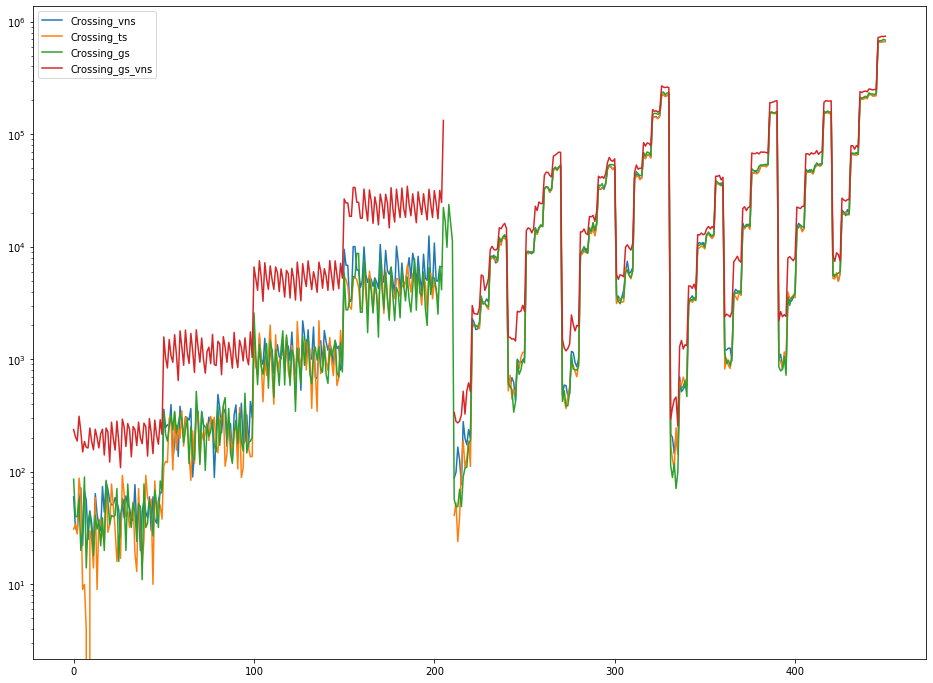

In [14]:
dados_org.loc[:, dados_org.columns.str.contains('Crossing', na=False)].plot(logy=True, figsize=(16,12))

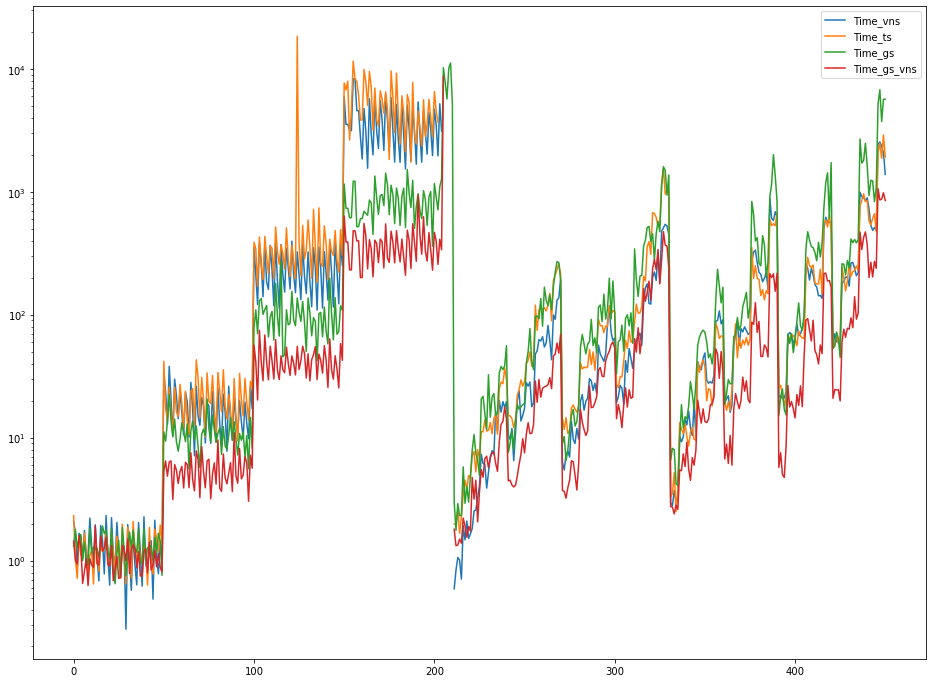

In [15]:
dados_org.loc[:, dados_org.columns.str.contains('Time', na=False)].plot(logy=True, figsize=(16,12))

In [16]:
Y_cmin = np.argmin(scale(dados_org.loc[:, dados_org.columns.str.contains('Crossing', na=False)], axis=1), axis=1)
Y_cmin

array([1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 0,
       1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 1,
       0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0, 2,
       2, 2, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0,
       1, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2,
       1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 0, 0, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 2, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 2,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,

In [17]:
X = dados_org.iloc[:, 1:11]
X

,V,E,V_diff,deg_mean,deg_std,deg_median,density,V1,V2,deg_min
0,46,43,26,1.87,1.41,1.00,0.12,36,10,1
1,42,39,22,1.86,1.32,1.00,0.12,32,10,1
2,38,35,18,1.84,1.18,1.00,0.12,28,10,1
3,46,44,26,1.91,1.41,1.00,0.12,36,10,1
4,42,39,22,1.86,1.28,1.00,0.12,32,10,1
...,...,...,...,...,...,...,...,...,...,...
446,160,1869,0,23.36,4.58,24.00,0.29,80,80,12
447,160,1873,0,23.41,4.12,23.00,0.29,80,80,13
448,160,1877,0,23.46,4.09,23.00,0.29,80,80,13
449,160,1879,0,23.49,4.17,23.00,0.29,80,80,13


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_cmin,test_size=.5,random_state =123)

In [30]:
(len(X_test), len(y_test), len(X_train), len(y_train))

(226, 226, 225, 225)

In [66]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import roc_auc_score

In [32]:
svm_clf=SVC()
svm_clf.fit(X_train,y_train)

SVC()

In [39]:
display(X_train)
y_train

,V,E,V_diff,deg_mean,deg_std,deg_median,density,V1,V2,deg_min
164,433,422,245,1.95,1.43,1.00,0.01,339,94,1
289,90,311,10,6.91,2.62,7.00,0.16,50,40,1
89,102,100,58,1.96,1.45,1.00,0.06,80,22,1
373,92,330,30,7.17,3.39,6.00,0.17,31,61,1
292,81,455,19,11.23,3.79,11.00,0.29,50,31,3
...,...,...,...,...,...,...,...,...,...,...
230,65,164,15,5.05,2.45,5.00,0.16,25,40,1
98,102,98,58,1.92,1.41,1.00,0.06,80,22,1
322,111,901,11,16.23,3.56,16.00,0.30,50,61,8
382,92,562,30,12.22,5.01,11.00,0.30,31,61,4


array([2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1,
       2, 0, 1, 1, 1, 2, 0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1,
       1, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       2, 1, 2, 1, 1, 1, 0, 0, 2, 2, 2, 0, 2, 1, 0, 2, 1, 0, 0, 1, 2, 2,
       2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 2, 0,
       1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       1, 0, 0, 2, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 2, 1, 1, 1, 2, 1, 0, 2,
       1, 1, 1, 1, 0], dtype=int64)

In [47]:
svm_clf.decision_function(X_test[:1])

array([[-0.22099543,  2.2149783 ,  1.04369319]])

In [48]:
svm_clf.classes_

array([0, 1, 2], dtype=int64)

In [55]:
ovr_svc = OneVsRestClassifier(SVC())
ovo_svc = OneVsOneClassifier(SVC())

ovr_svc.fit(X_train,y_train)
ovo_svc.fit(X_train,y_train)

OneVsOneClassifier(estimator=SVC())

In [72]:
ovr_svc.decision_function(X_train)

array([[-1.00027050e+00,  1.19985078e-01, -1.00071638e+00],
       [-9.99526842e-01,  4.86633359e-01, -1.00057811e+00],
       [-9.98680507e-01, -9.88787192e-01, -1.00002954e+00],
       [-9.99512444e-01,  5.18646467e-01, -1.00026921e+00],
       [-9.82188886e-01,  9.20010529e-01, -1.00007437e+00],
       [-1.00292474e+00,  1.08064674e-01, -9.99804671e-01],
       [-1.00812196e+00, -2.93623460e-01, -1.00043996e+00],
       [-1.00457571e+00, -2.23270284e-01, -9.99617333e-01],
       [-1.00559499e+00, -6.48482690e-01, -9.97904706e-01],
       [-1.12323390e+00, -1.72421014e-01, -9.80395944e-01],
       [-1.00286387e+00, -8.77404832e-01, -9.98302013e-01],
       [ 9.79283847e-01, -9.90360051e-01, -1.08452358e+00],
       [-1.00469649e+00,  1.09625722e-01, -1.00016531e+00],
       [-6.76647975e-01,  5.84437048e-01, -1.00830692e+00],
       [-1.00021444e+00, -7.37789334e-01, -9.98533815e-01],
       [-1.00516062e+00,  2.36668356e-02, -9.99893046e-01],
       [-1.00027076e+00, -1.00987833e+00

In [83]:
len(ovr_svc.decision_function(X_train)[:,1])

225

In [94]:
ovo_svc.estimators_

(SVC(), SVC(), SVC())

In [91]:
fpr_forest, tpr_forest, thresholds_forest=roc_auc_score(y_train.reshape(1,-1), y_train.reshape(1,-1), multi_class='ovr')

ValueError: multiclass-multioutput format is not supported

In [92]:
multi_class='ovr'
clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  3%|▎         | 1/29 [00:00<00:05,  5.18it/s]

ROC AUC couldn't be calculated for AdaBoostClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BaggingClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BernoulliNB
multi_class must be in ('ovo', 'ovr')


 14%|█▍        | 4/29 [00:00<00:03,  7.39it/s]

ROC AUC couldn't be calculated for CalibratedClassifierCV
multi_class must be in ('ovo', 'ovr')
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
ROC AUC couldn't be calculated for DecisionTreeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for DummyClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for ExtraTreeClassifier
multi_class must be in ('ovo', 'ovr')


 41%|████▏     | 12/29 [00:01<00:01, 13.80it/s]

ROC AUC couldn't be calculated for ExtraTreesClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for GaussianNB
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for KNeighborsClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LabelPropagation
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LabelSpreading
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 62%|██████▏   | 18/29 [00:01<00:00, 17.07it/s]

ROC AUC couldn't be calculated for LinearSVC
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LogisticRegression
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for NearestCentroid
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for NuSVC
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for PassiveAggressiveClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for Perceptron
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for QuadraticDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 90%|████████▉ | 26/29 [00:01<00:00, 16.13it/s]

ROC AUC couldn't be calculated for RandomForestClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifierCV
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for SGDClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for SVC
multi_class must be in ('ovo', 'ovr')
StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'
ROC AUC couldn't be calculated for XGBClassifier
multi_class must be in ('ovo', 'ovr')


100%|██████████| 29/29 [00:02<00:00, 11.84it/s]

ROC AUC couldn't be calculated for LGBMClassifier
multi_class must be in ('ovo', 'ovr')


In [46]:
models.sort_values('F1 Score', ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.50,0.40,None,0.49,0.24
XGBClassifier,0.48,0.41,None,0.49,0.42
BernoulliNB,0.52,0.46,None,0.48,0.03
RandomForestClassifier,0.47,0.40,None,0.48,0.38
ExtraTreeClassifier,0.47,0.39,None,0.48,0.02
BaggingClassifier,0.47,0.40,None,0.48,0.08
KNeighborsClassifier,0.49,0.37,None,0.48,0.05
GaussianNB,0.49,0.45,None,0.47,0.03
DecisionTreeClassifier,0.46,0.38,None,0.47,0.03


In [ ]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
X, y = make_multilabel_classification(random_state=0)
inner_clf = LogisticRegression(solver="liblinear", random_state=0)
clf = MultiOutputClassifier(inner_clf).fit(X, y)
y_score = np.transpose([y_pred[:, 1] for y_pred in clf.predict_proba(X)])
roc_auc_score(y, y_score, average=None)
